In [75]:
import os.path
import matplotlib.pyplot as plt
import pickle
import numpy as np
import re
import glob

%matplotlib inline

re_debug_infos = re.compile("^.*debug_infos_a.*$")

def moving_average(data, step):
    N = len(data) - step
    res = np.zeros(N)
    for i in range(N):
        res[i] = np.mean(data[i:i+step])
    return res

def analyze_experience(exp_dir, show_episode_len=True):
    """
    plot episode len
    """
    print exp_dir
    episode_len_fn = exp_dir + "/episode_len.p"
    if show_episode_len and os.path.isfile(episode_len_fn):
        episode_len = pickle.load(open(episode_len_fn, "r"))
        plt.figure(figsize=(15,15))
        for i, agent in enumerate(episode_len.T):
            plt.plot(moving_average(agent, 100), label='agent '+str(i))
        plt.legend()
        plt.title("episode len " + exp_dir)
        plt.show()

def analyze_batch(exp_dir):
    print exp_dir
    batch_files = glob.glob(exp_dir + "/debug_infos_a*")
    if len(batch_files) == 0:
        return
    print batch_files[-1]

    s = pickle.load(open(batch_files[-1], "r"))
    if len(s) == 6:
        a, X, R, mask, X_b, b = s
    elif len(s) == 5:
        a, X, R, mask, b = s

    def imshow(data, title):
        plt.figure(figsize=(30,10))
        im = plt.imshow(data)#, label='agent '+str(i))
        plt.colorbar(im,fraction=0.006, pad=0.04)
        plt.title(title + exp_dir)
        plt.show()
    end = 25
    i=np.argmin(mask.sum(axis=1))
    imshow((R)[:end], "return ")
    imshow((b*mask)[:end], "baseline")
    imshow(((R-b)*mask)[:end], "advantage ")

    imshow(mask[:end], "mask ")
    imshow(X_b[i].T, "X_b ")
    imshow(X[i].T, "X ")

    print "X_b",X_b[i,:end,:].T
    print "X", X[i,:end,:].T
    print "mask",mask[i,:end].T

    print "R",R[i,:end].T
    print "b",b[i,:end].T
    print "R-b",(R-b)[i,:end].T


res/full_len50more_n_landmarks-2_experience_memory-1000_bs-128_n_agents-1_n_iter_per_train-50_algo-rpg_baseline_rec_freq_train-1000_lr-0.001_observability-full_n_hidden-12_gamma-0.99_max_episode_len-50_
res/full_len50more_n_landmarks-2_experience_memory-1000_bs-128_n_agents-1_n_iter_per_train-50_algo-rpg_baseline_rec_freq_train-1000_lr-0.001_observability-full_n_hidden-12_gamma-0.99_max_episode_len-50_
res/full_len50more_n_landmarks-2_experience_memory-1000_bs-128_n_agents-1_n_iter_per_train-50_algo-rpg_baseline_rec_freq_train-1000_lr-0.001_observability-full_n_hidden-12_gamma-0.99_max_episode_len-50_
res/full_len50more_n_landmarks-2_experience_memory-1000_bs-128_n_agents-1_n_iter_per_train-50_algo-rpg_baseline_rec_freq_train-1000_lr-0.001_observability-full_n_hidden-12_gamma-0.99_max_episode_len-50_/debug_infos_a0_e18000.p.p


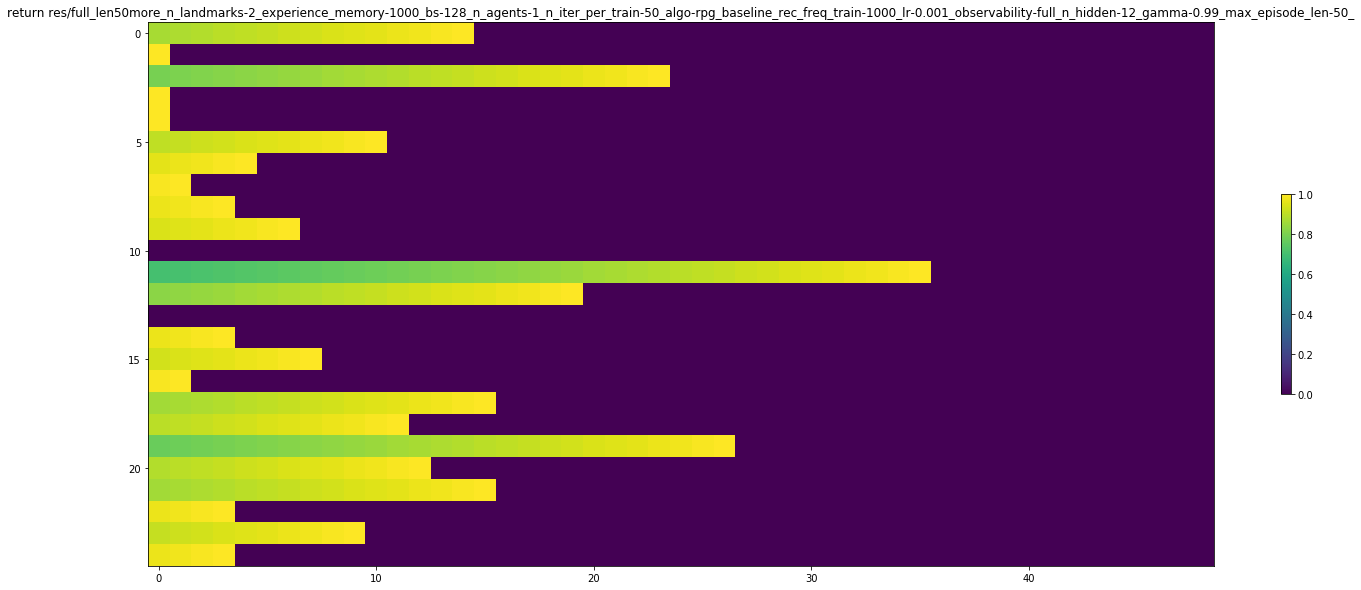

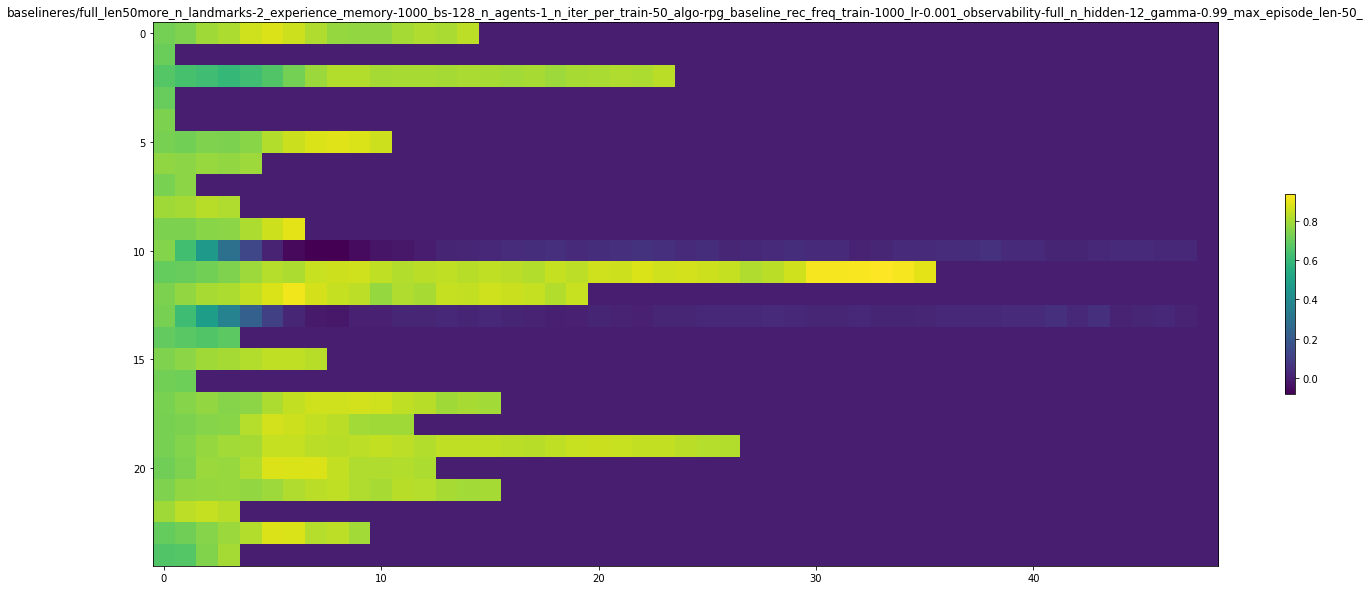

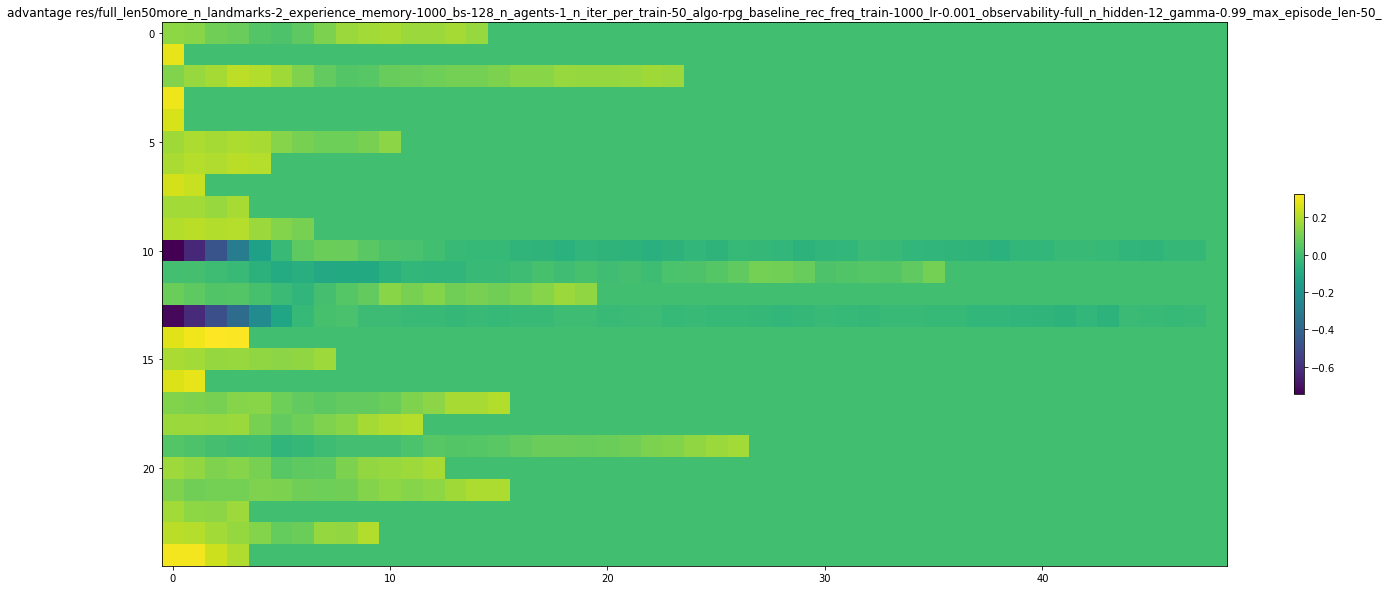

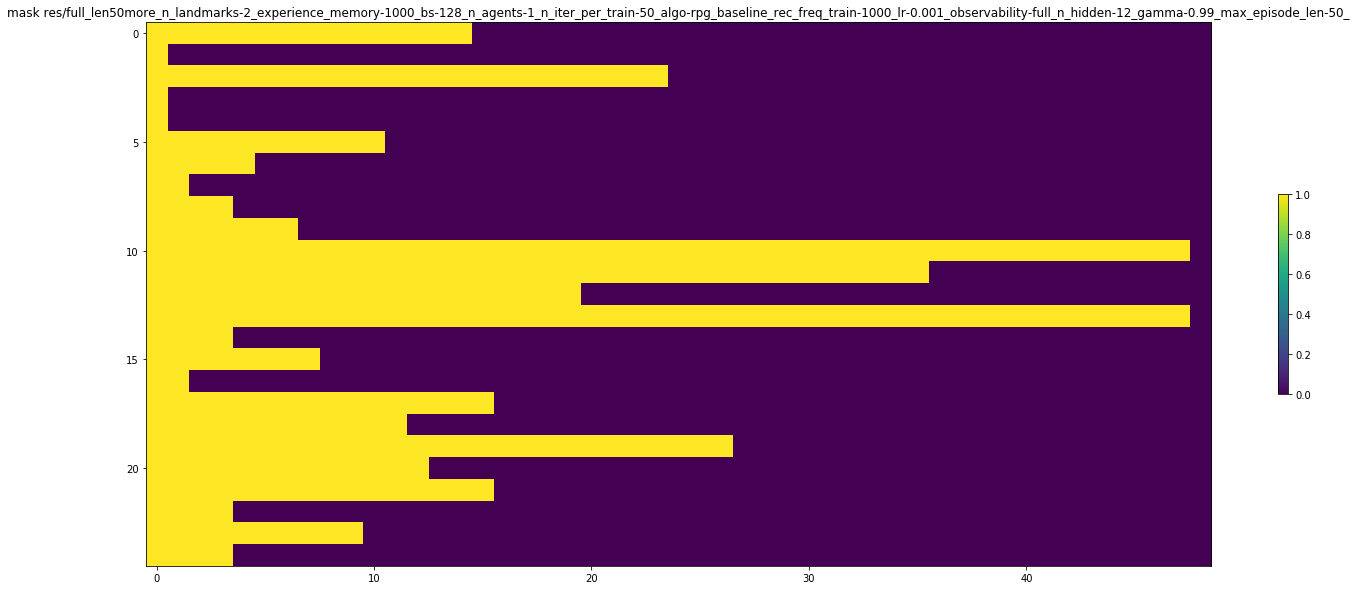

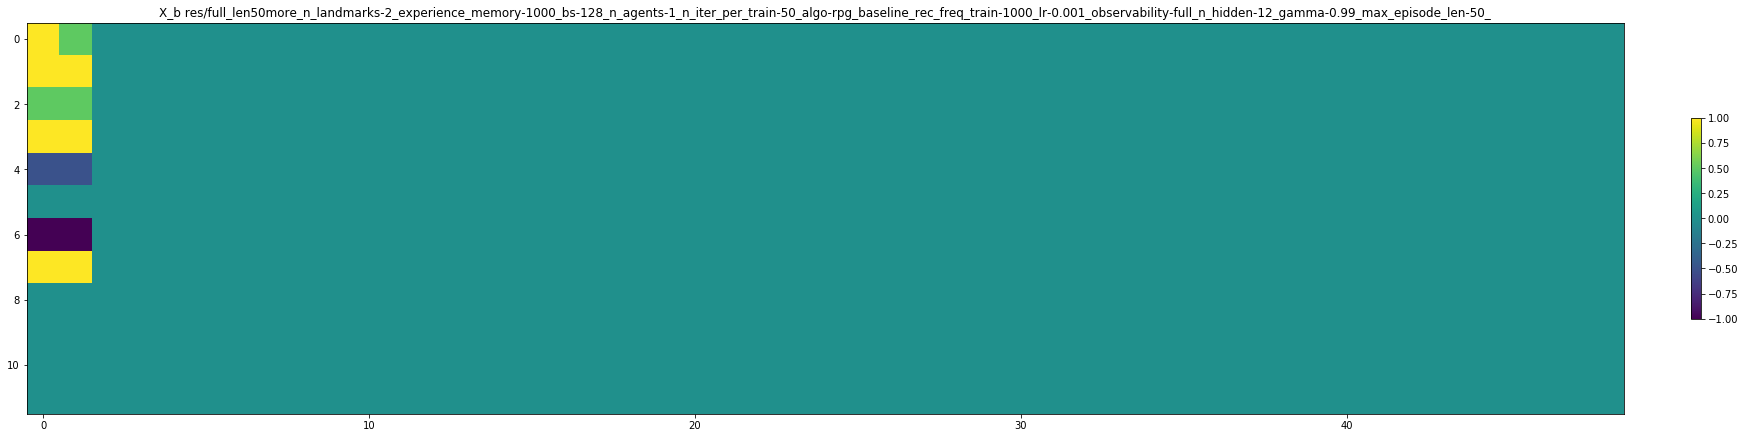

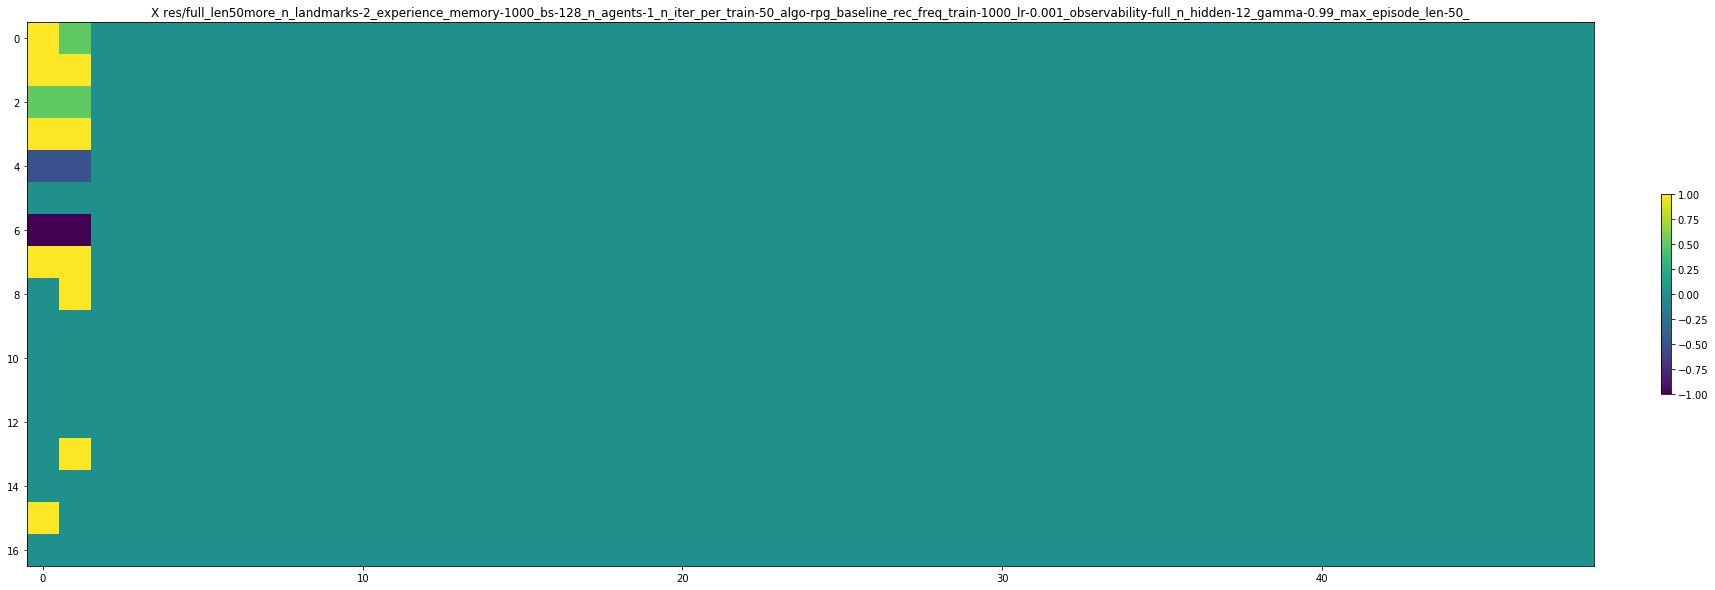

X_b [[ 1.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5 -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  

In [79]:
import re
pattern = re.compile("^.*full_len50more.*$")

results_dir = "res"
experience_dirs = [results_dir + "/" + d for d in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, d))]

for exp_dir in experience_dirs:
    if pattern.match(exp_dir):
        print exp_dir
        analyze_experience(exp_dir)
        analyze_batch(exp_dir)
    